In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/home/sdp/python/youtube_data_pipeline/data/youtube_data_final_20250803_202930.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (50, 12)


,video_id,title,description,channel_title,view_count,like_count,comment_count,published_at,published_date,published_year,published_month,extracted_at
0,OiLgG4CabPo,15 POWERFUL Python Libraries You Should Be Using,💡 Learn how to design great software in 7 step...,ArjanCodes,97043,3328,194,2024-10-18 15:00:23+00:00,2024-10-18,2024,10,2025-08-03 20:29:30.226964
1,BplMR0txSeA,"Python on phone, pydroid 3 #python #android #c...",Pydroid3: https://play.google.com/store/apps/d...,Electro Sage,123438,0,17,2025-02-19 11:43:05+00:00,2025-02-19,2025,2,2025-08-03 20:29:30.226982
2,I_NUFSoeiEg,The perfect mat for programmers 😫 #lua #coding...,NaN,Desk Mate,12667643,241972,2189,2025-02-20 01:12:32+00:00,2025-02-20,2025,2,2025-08-03 20:29:30.226987
3,LXaFRKrTJVU,Introducing Pyrefly: A new type checker and ID...,"Introducing a brand new open source project, P...",Meta Open Source,115898,4270,258,2025-05-22 16:17:01+00:00,2025-05-22,2025,5,2025-08-03 20:29:30.226991
4,IPOr0ran2Oo,How to install Python 3.13.0 on Windows 10,"In this video, learn to download and install P...",Amit Thinks,158227,1715,96,2024-10-11 15:30:04+00:00,2024-10-11,2024,10,2025-08-03 20:29:30.226995


In [3]:
df.describe()

,view_count,like_count,comment_count,published_year,published_month
count,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000
mean,4.110275e+06,1.185021e+05,5153.580000,2023.260000,6.620000
std,1.005773e+07,2.626083e+05,16004.085027,1.723902,3.619054
min,8.000000e+02,0.000000e+00,3.000000,2018.000000,1.000000
25%,2.990072e+05,5.528250e+03,99.000000,2022.000000,3.000000
50%,9.011805e+05,2.080200e+04,309.000000,2023.500000,8.000000
75%,1.958974e+06,1.049630e+05,1437.250000,2025.000000,10.000000
max,4.732935e+07,1.206223e+06,85792.000000,2025.000000,12.000000


In [4]:
print("Data types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

Data types:
video_id           object
title              object
description        object
channel_title      object
view_count          int64
like_count          int64
comment_count       int64
published_at       object
published_date     object
published_year      int64
published_month     int64
extracted_at       object
dtype: object

Missing values:
video_id           0
title              0
description        4
channel_title      0
view_count         0
like_count         0
comment_count      0
published_at       0
published_date     0
published_year     0
published_month    0
extracted_at       0
dtype: int64


In [5]:
top_channels = df.groupby('channel_title')['view_count'].sum().sort_values(ascending=False).head(10)
print("Top 10 channels by total views:")
print(top_channels)

Top 10 channels by total views:
channel_title
Programming with Mosh    70039306
freeCodeCamp.org         50910471
GOT7                     27839893
Desk Mate                12667643
b001                      6879880
TechWorld with Nana       6448280
Kevin Stratvert           3855913
Fireship                  2878315
DEV19                     2719194
NetworkChuck              2710923
Name: view_count, dtype: int64


Correlation between views and likes: 0.977


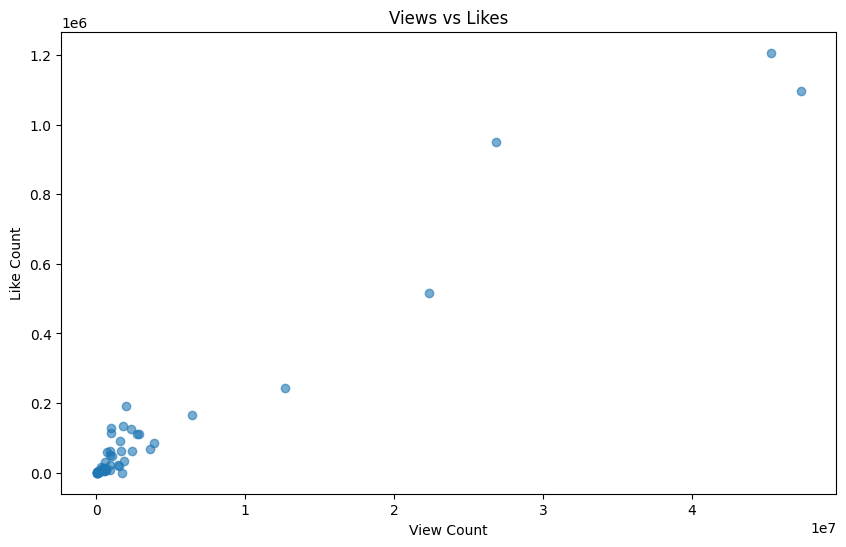

In [6]:
correlation = df['view_count'].corr(df['like_count'])
print(f"Correlation between views and likes: {correlation:.3f}")

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['view_count'], df['like_count'], alpha=0.6)
plt.xlabel('View Count')
plt.ylabel('Like Count')
plt.title('Views vs Likes')
plt.show()

Videos by year:
published_year
2018     1
2019     1
2020     1
2021     5
2022     6
2023    11
2024     9
2025    16
Name: count, dtype: int64


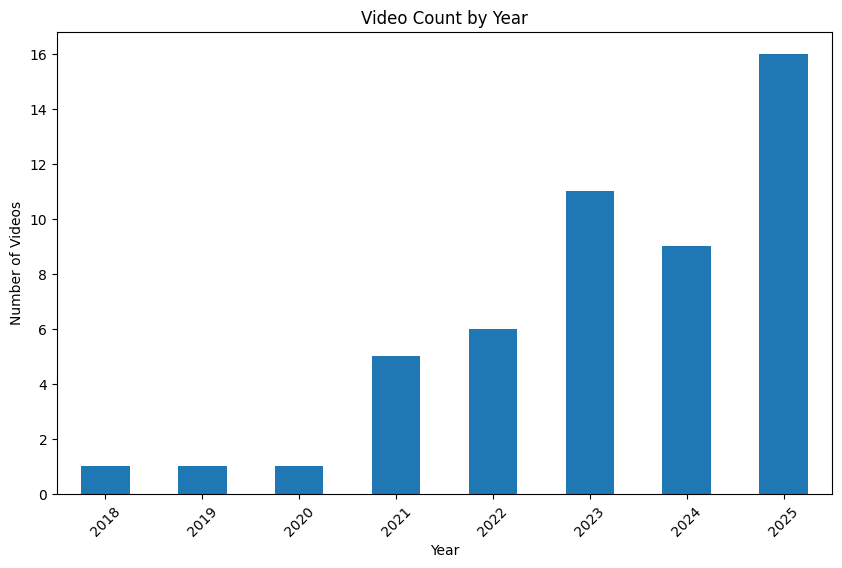

In [8]:
yearly_count = df['published_year'].value_counts().sort_index()
print("Videos by year:")
print(yearly_count)

# Bar plot
plt.figure(figsize=(10, 6))
yearly_count.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Videos')
plt.title('Video Count by Year')
plt.xticks(rotation=45)
plt.show()

Top 10 channels by average views:
channel_title
freeCodeCamp.org                     2.545524e+07
Programming with Mosh                2.334644e+07
GOT7                                 1.391995e+07
Desk Mate                            1.266764e+07
TechWorld with Nana                  6.448280e+06
Kevin Stratvert                      3.855913e+06
Fireship                             2.878315e+06
NetworkChuck                         2.710923e+06
Sahil & Sarra                        2.002515e+06
Binary Tech - Software Developer     1.828350e+06
Name: view_count, dtype: float64


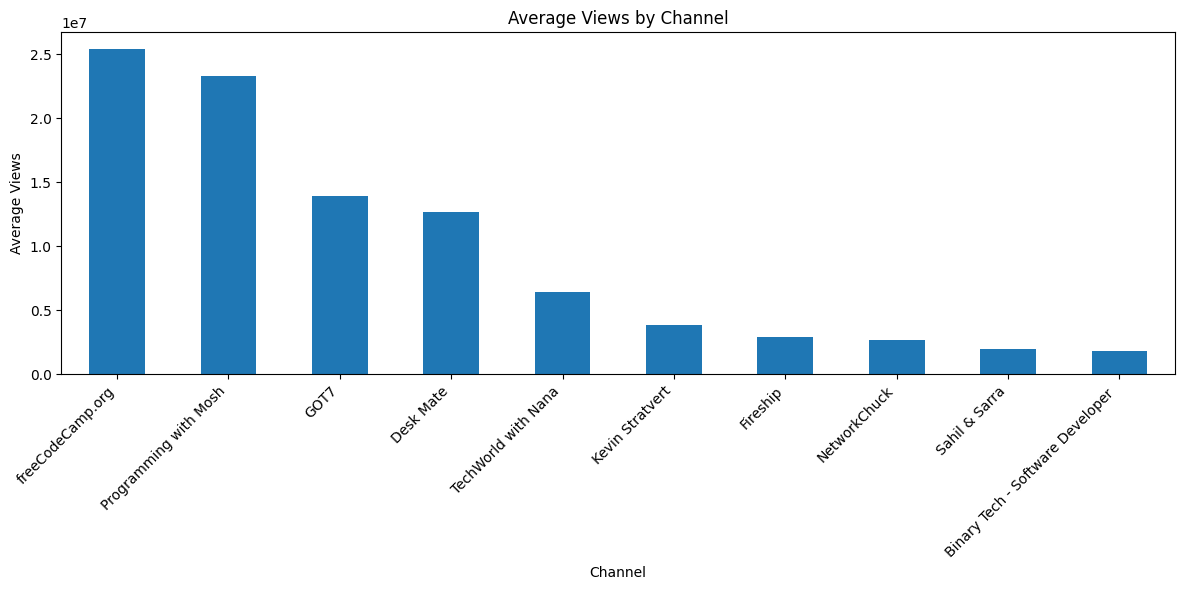

In [10]:
avg_views_by_channel = df.groupby('channel_title')['view_count'].mean().sort_values(ascending=False).head(10)
print("Top 10 channels by average views:")
print(avg_views_by_channel)

# Bar plot
plt.figure(figsize=(12, 6))
avg_views_by_channel.plot(kind='bar')
plt.xlabel('Channel')
plt.ylabel('Average Views')
plt.title('Average Views by Channel')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 channels by engagement rate (1000+ views):
channel_title
M2                       11.647095
Sahil & Sarra             9.535409
El Pingüino de Mario      8.340532
GOT7                      8.225844
Python Cowboy             7.903544
Error Makes Clever        7.029338
Ellie's Exotics           6.411837
b001                      5.951918
HitraN the Programmer     5.352972
ArjanCodes                4.311107
Name: engagement_rate, dtype: float64


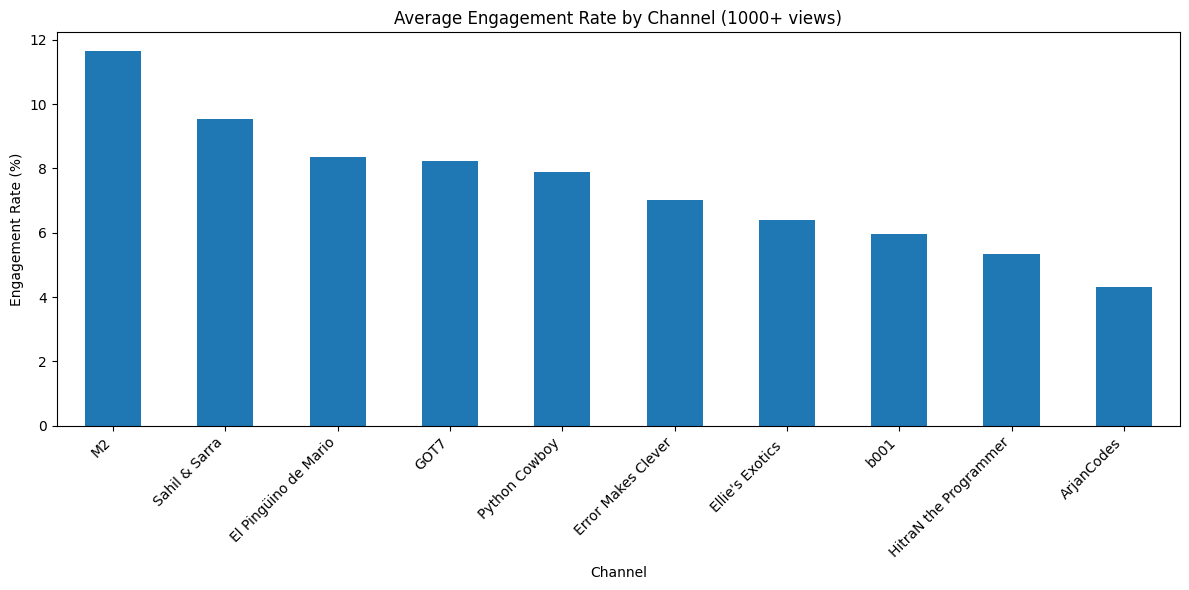

In [13]:
df['engagement_rate'] = (df['like_count'] / df['view_count']) * 100
filtered_df = df[df['view_count'] >= 1000]
top_engagement = filtered_df.groupby('channel_title')['engagement_rate'].mean().sort_values(ascending=False).head(10)
print("Top 10 channels by engagement rate (1000+ views):")
print(top_engagement)

plt.figure(figsize=(12, 6))
top_engagement.plot(kind='bar')
plt.xlabel('Channel')
plt.ylabel('Engagement Rate (%)')
plt.title('Average Engagement Rate by Channel (1000+ views)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:

print(f"Total videos analyzed: {len(df)}")
print(f"Total channels: {df['channel_title'].nunique()}")
print(f"Date range: {df['published_at'].min()} to {df['published_at'].max()}")

print("\nTop performing channels:")
top_5_channels = df.groupby('channel_title')['view_count'].sum().sort_values(ascending=False).head(5)
for channel, views in top_5_channels.items():
    print(f"  {channel}: {views:,} total views")

print(f"\nAverage views per video: {df['view_count'].mean():,.0f}")
print(f"Median views per video: {df['view_count'].median():,.0f}")

if 'engagement_rate' in df.columns:
    print(f"Average engagement rate: {df['engagement_rate'].mean():.2f}%")

Total videos analyzed: 50
Total channels: 37
Date range: 2018-07-11 18:00:42+00:00 to 2025-08-03 01:00:01+00:00

Top performing channels:
  Programming with Mosh: 70,039,306 total views
  freeCodeCamp.org: 50,910,471 total views
  GOT7: 27,839,893 total views
  Desk Mate: 12,667,643 total views
  b001: 6,879,880 total views

Average views per video: 4,110,275
Median views per video: 901,180
Average engagement rate: 3.84%
